## 2. Few-qubit dynamics

Qubits in isolation don't do much. We want to get more of them together, and we want to entangle them. To do so, let's start with a quick recap of the Hamiltonian describing the dynamics of several atoms, which we will index by $i$. 

Dynamics are controlled, generally, but the **Rabi amplitude** terms, which may or may not include a phase $\phi$, and act individually (but uniformly) on each atom according to

$$
 \sum_i \frac{\Omega(t)}{2} \left( e^{i \phi(t) } | g_i \rangle  \langle r_i | + e^{-i \phi(t) } | r_i \rangle  \langle g_i | \right).
$$

The **deturning** term $\Delta$ represents how off-resonant the laser is from the atomic energy transition and incurr an energy cost (positive or negative) for excitations into the Rydberg state:

$$
\sum_i \Delta(t) \hat{n}_i,
$$

where

$\hat{n}_i= 0|g_i \rangle  \langle g_i | + 1| r_i \rangle  \langle r_i |. $  


Finally, when multiple atoms are excited to a Rydberg state, they are subject to Van der Waals interactions, which is captured by the term
$$
\sum_{i < j} V_{ij} \hat{n}_i \hat{n}_j
$$

where $V_{ij}$ is given by
$$
V_{ij} = \frac{C_6}{|x_i - x_j|^6}.
$$

Here $C_6 = 862,690 MHz \mu m^6 $ is the Rydberg interaction coefficient.

Bringing it all together, we obtain

$$
\frac{\mathcal{H}(t)}{\hbar} = \sum_i \frac{\Omega(t)}{2} \left( e^{i \phi(t) } | g_i \rangle  \langle r_i | + e^{-i \phi(t) } | r_i \rangle  \langle g_i | \right) - \sum_i \Delta(t) \hat{n}_i + \sum_{i < j} V_{ij} \hat{n}_i \hat{n}_j,
$$
as in the previous chapter.

### 2a. Rydberg blockade phenomenon

When neutral-atom qubits are brought into contact, they may interact and entangle. The physical processes by which this can be controlled is characterized by the last term in the Hamiltonian above, the 2-qubit interaction energy $V_{ij}$.

The key observation is that when an atom is “puffed-up” to a **Rydberg state**, it is capable of a strongly shifting the energies of the states of adjacent atoms, conditional on them being also excited to Rydberg levels. In other words, if two atoms "$i$" and "$j$" are close together (on a length scale of order 𝜇𝑚), they interact through a state-dependent energy shift. If none or only one atom is in the Rydberg state, there is no energy shift as $\hat{n}_i \hat{n}_j=0$. If both atoms are in the Rydberg state, however, the energy of that state is further shifted by $V_{ij}$. If this shift is large enough, the state with double excitation is effectively expelled from the Hilbert space: no combination of $\Omega$ and $\Delta$ will enable us to access it! This phenomenon is known as the **Rydberg blockade**, as an atom excited to a Rydberg state blocks its neighbors from exciting as well.

> it is crucial to appreciate: the Rydberg blockade phenomnenon can **digitize** the conditional dynamics. Once atoms get close enough, they are **always** blocked no matter the details of how close they get. Because the $1/r_{ij}^6$ power law decays extremely fast, once atoms are far away, they are **always** independent. **No fine tuning is necessary**, but, of course, how one leverages these interactions for generating complex quantum dynamics can be quite subtle.  

But how close is "close enough"? How can we observe this Rydberg blockade phenomenon? And how can we use it for solving interesting problems with our quantum computer? 

Answering these questions is the topic of this section!

### 2b. The Rydberg blockade radius

Let's start by quantifying our sense of how much "close" is "too close", i.e., what is the characteristic distance at which the Rydberg blockade mechanism sets in.

For this, consider a problem of two atoms in the presence of a Rabi oscillation field. The Hamiltonian for this problem can be written

$$
H_{12}= \frac{\Omega}{2} \left( |g_1 \rangle \langle r_1| + |g_2 \rangle \langle r_2| + H.c.\right) +V_{12}\hat{n}_1\hat{n}_2
$$



<img style="float: right;" src="./assets/energetics.png" width="350" height="auto" />


If the atoms are a distance $d$ apart, $𝑉_{12}=C_6/d^6$.

To set up the scale for blockading interactions, we need to think a bit like physicists. We ought to appreciate that $𝑉_{12}$ is a power-law, and does not have a natural scale for large or small $d$. Yet, the blockading phenomenon is always a function of our capacity to generate excitations into the $|r_1 r_2 \rangle$ state. While the enegy of that state depends on the distance between the atoms, if $\Omega$ is large enough, in fact, it is always possible to generate excitations into it. Converselly, for a fixed Rabi amplitude, there is always a distance small enough beyond which we cannot access the doubly excited state any more.

So all we have to do is to compare $𝑉_{12}$ with $\Omega$ to set that characteristic distance. Equating $𝑉_{12}=\Omega$, we can solve for said corresponding distance, which we name $R_B$, obtaining

$$
R_B= (C_6⁡/\Omega)^{1/6}.
$$

A clear interpretation of this can be obtained by looking at the spectrum of $H_{12}$, first in the absence of $\Omega$, and then in a "hypothetical" absence of $V_{12}$. We reproduce this spectrum as function of $d$ in the figure above. The  $y$-axis corresponds to energy and black dashes at $d=0$ mark the spectrum in the absence of $V_{12}$. The red curves, conversely, correspond to the energy levels in the absence of $\Omega$, when only $V_{12}$ is present. The red curve that bends up is the energy of the $|r_1 r_2 \rangle$ state. The blockade radius marks the crossing between $\Omega$, and $V_{12}$. Atoms at any distance smaller than at this crossing simply cannot be excited by the Rabi amplitude.

> Note that the argument above works when only one dynamic energy scale exists, $\Omega$. When detuning values are present, a similar argument applies but, in this case, first one has to combine $\Omega$ and $\Delta$ into the true dynamical energy scale of the qubits. In this case, the blockade radius formula generalizes to
> $$
> R_𝒃 = [\frac{C_6}{⁡{\sqrt{\Omega^2 + \Delta^2}⁡}}]^{1/6}
> $$

#### Example: Two-atom dynamics

Let's go back to our Rabi oscillations problem and re-study the problem with two atoms in order to observe the effects of the Rydberg blockade.

Let's start by picking up some scales for dynamics
First let's start with a little DIY function that ingests the qubit register and a given

In [1]:
#section imports
from bloqade import start
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bloqade.atom_arrangement import ListOfLocations
import numpy as np
output_notebook()

#parameter definitions
detuning=0
max_omega = 2*np.pi*2

C6 = 2*np.pi * 862690;

Rb = (C6 / max_omega) ** (1/6)
print("Rydberg Radius: ",Rb)

Loading BokehJS ...

Rydberg Radius:  8.692355131311515


We are picking $\Omega = 2MHz$ and converting to $rad/\mu s$ units. We are expecting $R_B\approx 8.7 \mu m$ here.

Let's start by analyzing geometry here. We put two atoms into our register, considerably far apart with respect to our predicted $R_B$ so they do not interact with each other. Let's say we begin with atoms separated by $20\mu m$ along the y-direction.

In [2]:
#pick a distance!
dist = 20

atom_coord=[(0, 0), (0,dist)]

ListOfLocations(atom_coord).show()

Note the "Blockade radius" toggle button. If you type $8.7$ here, our expected characteristic radius of interaction, and click on "Toggle", you will see that, indeed, the atoms seem far apart enough to not interact.

Now let's put together a short DYI function that ingests a geometry, conditions for a constant detuning and a trapezoidal Rabi amplitude waveforms, a total evolution time, and runs a full Rabi oscillation experiment while plotting the Rydberg occupation of a single atom as function of time, same as we did above. Here we go:

In [3]:
def many_body_dynamics(atom_coord, max_omega, max_run_time):

    run_times = np.linspace(0, max_run_time-0.2, 61)
    n_atom = len(atom_coord)
    
    program = (
        start.add_position(atom_coord)
        .rydberg.rabi.amplitude.uniform.piecewise_linear(durations = [0.1, "run_time", 0.1],values = [0, max_omega, max_omega, 0])
        .detuning.uniform.constant(duration=sum(run_times), value=0)
        )
    
    two_atom_job = program.batch_assign(run_time=run_times)
    
    emulator_batch = two_atom_job.bloqade.python().run(100)
    
    emulator_report=emulator_batch.report()
    times = emulator_report.list_param("run_time")
    for i in range (len(times)):
        times[i]=times[i]+ 0.2
    density = [n_atom - n_atom*ele.mean() for ele in emulator_report.bitstrings()]
    plt.plot(times, density, color="#878787", marker=".", label="Emulator")
    
    plt.ylim(0, n_atom) 
    plt.xlabel("Time ($\mu s$)")
    plt.ylabel("Rydberg population")
    plt.legend()
    plt.show()

Now we are ready to run! Let's see what we get for a $2 \mu s$ simulated experiment.

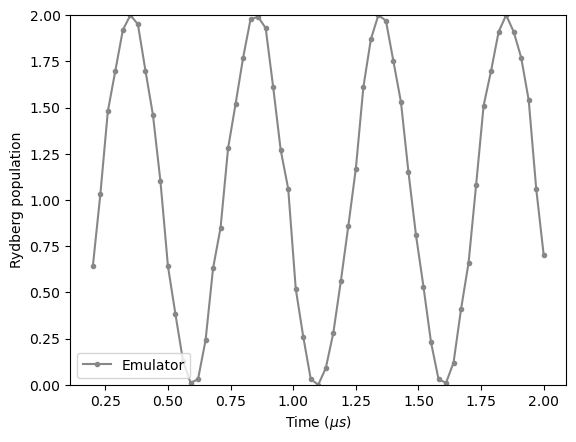

In [4]:
max_run_time = 2.0

many_body_dynamics(atom_coord, max_omega,max_run_time)

In [ ]:
FreeResponseQuestion("exercise22b")